<a href="https://colab.research.google.com/github/Zabihuddin/data_analysis/blob/main/1_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/dataDEGs.csv'


df = pd.read_csv(path)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   logFC      409 non-null    float64
 1   logCPM     409 non-null    float64
 2   LR         409 non-null    float64
 3   PValue     409 non-null    float64
 4   FDR        409 non-null    float64
 5   gene_name  409 non-null    object 
 6   gene_type  409 non-null    object 
dtypes: float64(5), object(2)
memory usage: 22.5+ KB


In [ ]:
rows,cols=df.shape
print(f'number of rows:{rows} nuumber of columns:{cols}')

number of rows:409 nuumber of columns:7


In [ ]:
print(f' followings columns features exist in the dataset: {df.columns }')

 followings columns features exist in the dataset: Index(['logFC', 'logCPM', 'LR', 'PValue', 'FDR', 'gene_name', 'gene_type'], dtype='object')


In [ ]:
df.head(10)

,logFC,logCPM,LR,PValue,FDR,gene_name,gene_type
0,9.002815,-1.184566,16.469407,0.000049,0.006529,KRT33A,protein_coding
1,9.504382,1.589077,18.654571,0.000016,0.003214,DLX6,protein_coding
2,-5.330197,3.564229,18.593286,0.000016,0.003284,CACNA2D2,protein_coding
3,9.266483,3.111430,18.282856,0.000019,0.003633,GABRA3,protein_coding
4,-3.596017,3.577662,15.363317,0.000089,0.009082,ALOX5,protein_coding
5,-4.647538,4.612027,23.343012,0.000001,0.000673,MARCO,protein_coding
6,-4.065432,6.870538,18.274217,0.000019,0.003633,FHL1,protein_coding
7,6.401406,3.219836,17.211407,0.000033,0.005086,DEPDC1B,protein_coding
8,-6.197737,0.445750,20.245639,0.000007,0.001990,CDH10,protein_coding
9,-3.898110,2.301709,16.708779,0.000044,0.006002,ARHGAP6,protein_coding


In [ ]:
df.sample(5)

,logFC,logCPM,LR,PValue,FDR,gene_name,gene_type
134,-5.827902,-1.968357,18.825133,0.000014,0.003092,RSPO1,protein_coding
74,7.026434,5.682842,15.697848,0.000074,0.008432,CTSV,protein_coding
188,-6.022368,-4.661380,15.996946,0.000063,0.007594,RNU1-22P,snRNA
16,6.249744,6.121154,17.779222,0.000025,0.004233,BIRC5,protein_coding
3,9.266483,3.111430,18.282856,0.000019,0.003633,GABRA3,protein_coding


In [ ]:
df.describe()

,logFC,logCPM,LR,PValue,FDR
count,409.000000,409.000000,409.000000,4.090000e+02,4.090000e+02
mean,-2.756194,-0.534150,19.797953,3.212785e-05,4.218970e-03
std,6.655971,3.380803,5.105260,3.251370e-05,3.183827e-03
min,-11.445532,-4.710289,15.031246,2.745831e-13,1.058820e-08
25%,-6.658211,-3.590990,16.311057,3.535978e-06,1.323795e-03
50%,-5.389673,-1.133642,18.171909,2.018341e-05,3.796548e-03
75%,-4.013934,1.954311,21.501252,5.374940e-05,6.751240e-03
max,19.171074,11.418643,53.382131,1.057458e-04,9.969841e-03


#Duplicated values

In [ ]:
duplicate_rows = df.duplicated().sum()
duplicate_rows


0

##missing Values

In [ ]:
missing_values = df.isnull().sum()
missing_values


,0
logFC,0
logCPM,0
LR,0
PValue,0
FDR,0
gene_name,0
gene_type,0


##Summary Statistics

In [ ]:
"""ummary_stats = pd.DataFrame({
    "Mean": df.iloc[:, :-1].mean(),
    "Median": df.iloc[:, :-1].median(),
    "Variance": df.iloc[:, :-1].var()
})
summary_stats"""


'ummary_stats = pd.DataFrame({\n    "Mean": df.iloc[:, :-1].mean(),\n    "Median": df.iloc[:, :-1].median(),\n    "Variance": df.iloc[:, :-1].var()\n})\nsummary_stats'

In [ ]:
# find missing values in each column

print(f'are missing values find in each column\n{df.isnull().sum().sort_values(ascending=False)}')

are missing values find in each column
logFC        0
logCPM       0
LR           0
PValue       0
FDR          0
gene_name    0
gene_type    0
dtype: int64


In [ ]:
#female,male = df['gene_name'].value_counts()
#print(f' There are {male} male patients and {female} female patients in the dataset')

**Univariate analysis**

In [ ]:
#df.gene_name.unique().value

In [ ]:
df['gene_type'].unique()

array(['protein_coding', 'unprocessed_pseudogene', 'lncRNA', 'snRNA',
       'processed_pseudogene', 'transcribed_unprocessed_pseudogene',
       'miRNA', 'TR_J_gene', 'snoRNA', 'misc_RNA', 'TEC'], dtype=object)

In [ ]:
print(f'There are following patients in gene_name  \n {df.gene_name.value_counts()} ')

There are following patients in gene_name  
 gene_name
KRT33A        1
AL035670.1    1
AC092958.1    1
LINC01625     1
LINC01352     1
             ..
RSPO1         1
SHOX2         1
LGI3          1
GPD1          1
AC016925.3    1
Name: count, Length: 409, dtype: int64 


In [ ]:
print(f'There are following patients in gene_type  \n {df.gene_type.value_counts()} ')

There are following patients in gene_type  
 gene_type
protein_coding                        207
lncRNA                                153
processed_pseudogene                   16
transcribed_unprocessed_pseudogene      7
TEC                                     7
unprocessed_pseudogene                  6
snRNA                                   4
miRNA                                   4
misc_RNA                                3
TR_J_gene                               1
snoRNA                                  1
Name: count, dtype: int64 


In [ ]:
df.count()

,0
logFC,409
logCPM,409
LR,409
PValue,409
FDR,409
gene_name,409
gene_type,409


In [ ]:
#duplicates = df.sample(15)
#df = pd.concat([df, duplicates])


In [ ]:
#df.count()

In [ ]:
#finding the duplicates in the dataset
df[df.duplicated()]

,logFC,logCPM,LR,PValue,FDR,gene_name,gene_type


In [ ]:
#print(f'Following are the total duplicate rows in the dataset {df["gene_type"].duplicated().sum()}')

In [ ]:
#print(f'Following are the total duplicate rows in the dataset {df["gene_name"].duplicated().sum()}')

In [ ]:
##print(f'Following are the total duplicate rows in the dataset {df["logFC"].duplicated().sum()}')

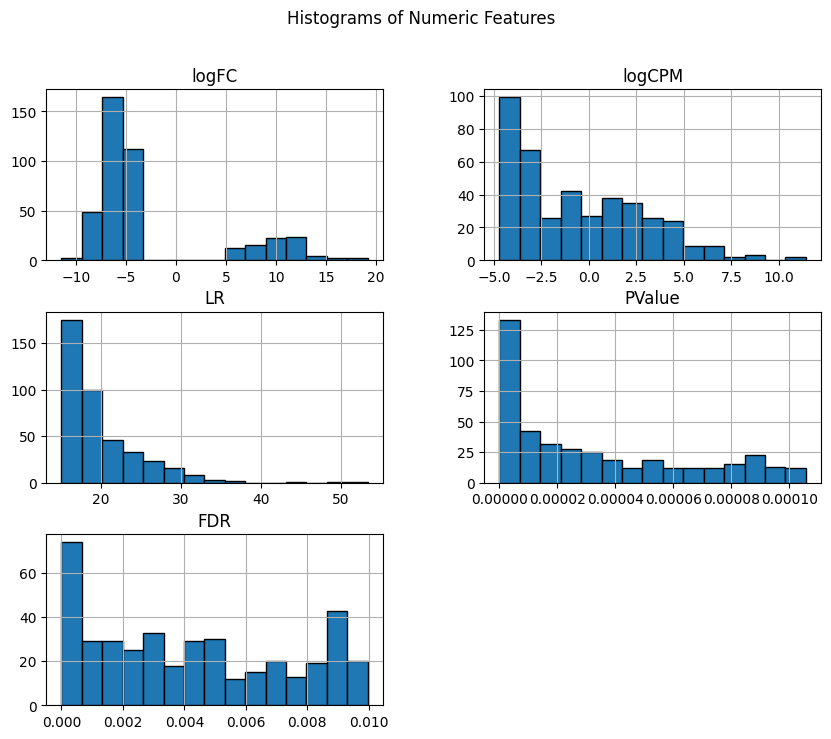

In [ ]:
df.iloc[:, :-1].hist(figsize=(10, 8), bins=15, edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.show()

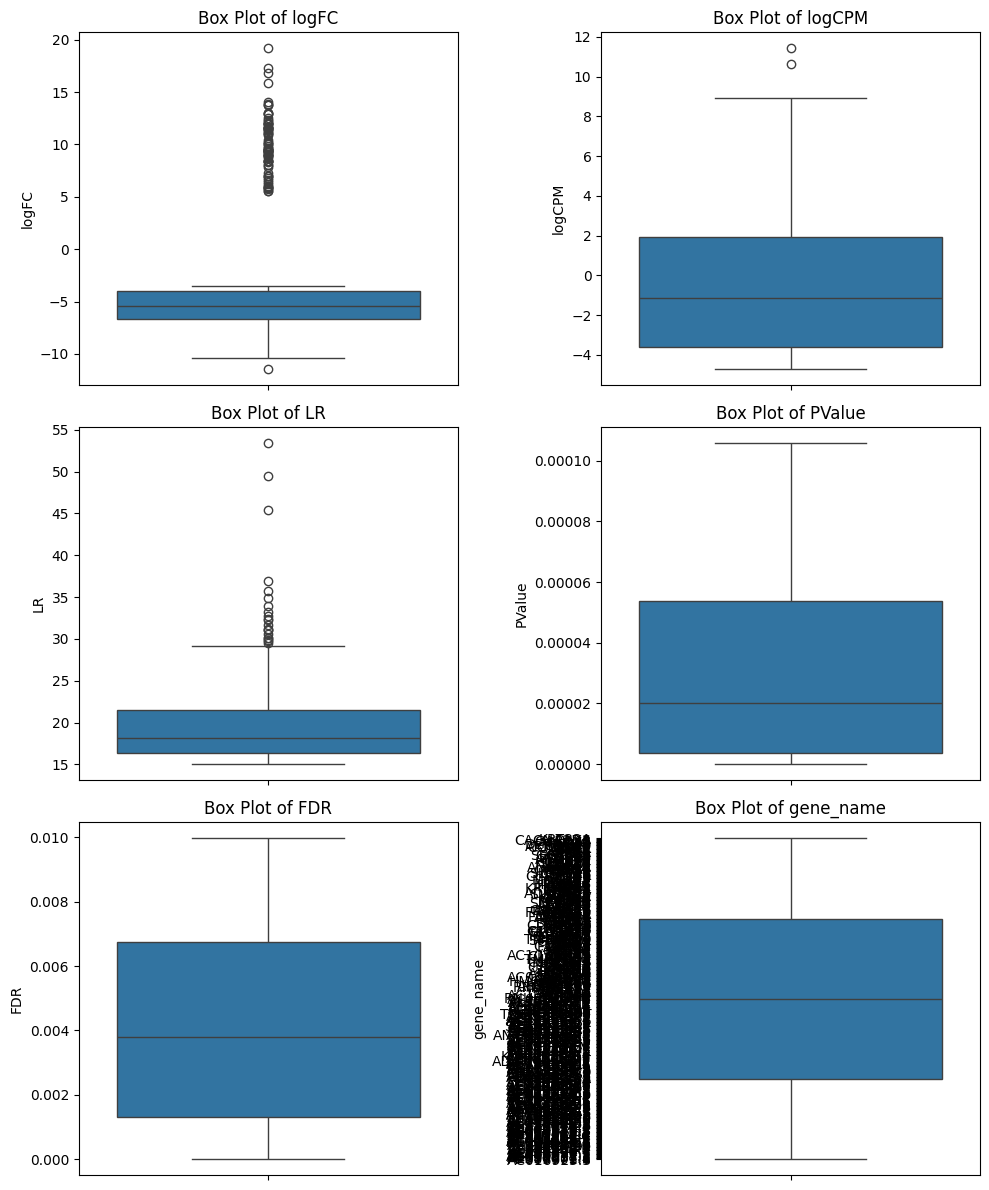

In [ ]:
plt.figure(figsize=(10, 12))  # Increased figure height to accommodate more plots

# Calculate the number of rows and columns for the subplots
num_cols = len(df.columns[:-1])
num_rows = (num_cols + 1) // 2  # Calculate rows needed, ensuring at least 2 columns per row

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(num_rows, 2, i + 1)  # Dynamically adjust subplot grid
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [ ]:


# Get the first 5 unique gene names
unique_gene_names = df["gene_name"].unique()[:5]

# Filter the DataFrame for rows with these unique gene names
filtered_data = df[df["gene_name"].isin(unique_gene_names)]

print("Data for the First 5 Unique Gene Names:")
print(filtered_data)

Data for the First 5 Unique Gene Names:
      logFC    logCPM         LR    PValue       FDR gene_name       gene_type
0  9.002815 -1.184566  16.469407  0.000049  0.006529    KRT33A  protein_coding
1  9.504382  1.589077  18.654571  0.000016  0.003214      DLX6  protein_coding
2 -5.330197  3.564229  18.593286  0.000016  0.003284  CACNA2D2  protein_coding
3  9.266483  3.111430  18.282856  0.000019  0.003633    GABRA3  protein_coding
4 -3.596017  3.577662  15.363317  0.000089  0.009082     ALOX5  protein_coding


# Multivariate analysis

### create pair plots


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) th

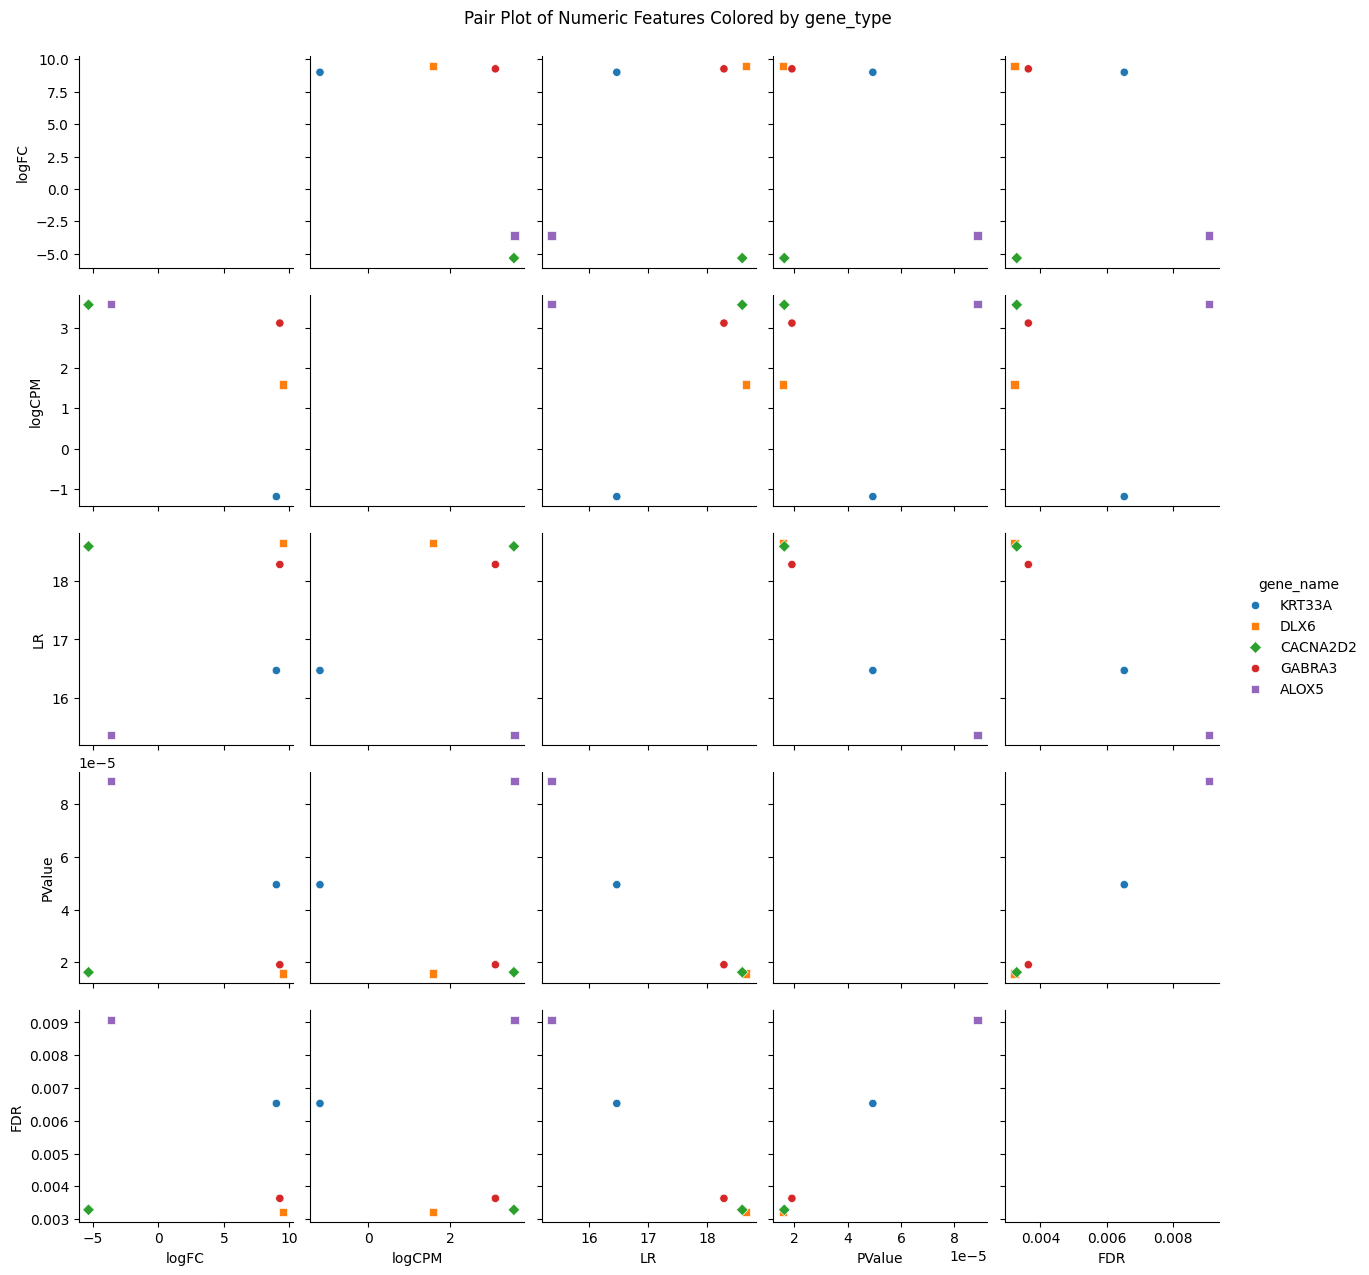

In [ ]:
sns.pairplot(filtered_data, hue="gene_name", diag_kind="kde", markers=["o", "s", "D"], height=2.5)
plt.suptitle('Pair Plot of Numeric Features Colored by gene_type', y=1.02)
plt.show()

#class Distibutation

In [ ]:
class_counts = df['gene_type'].value_counts()
class_counts

,count
gene_type,
protein_coding,207
lncRNA,153
processed_pseudogene,16
transcribed_unprocessed_pseudogene,7
TEC,7
unprocessed_pseudogene,6
snRNA,4
miRNA,4
misc_RNA,3


#outlier detection with IQR



In [ ]:
outliers = {}
for column in df.select_dtypes(include=np.number).columns:  # Select only numeric columns
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

outliers

{'logFC': 83, 'logCPM': 2, 'LR': 21, 'PValue': 0, 'FDR': 0}

#visualize summary of outliers

In [ ]:
outlier_summary = pd.DataFrame(list(outliers.items()), columns=['Feature', 'Number of Outliers'])
outlier_summary

,Feature,Number of Outliers
0,logFC,83
1,logCPM,2
2,LR,21
3,PValue,0
4,FDR,0


#Feature relationship with target variable

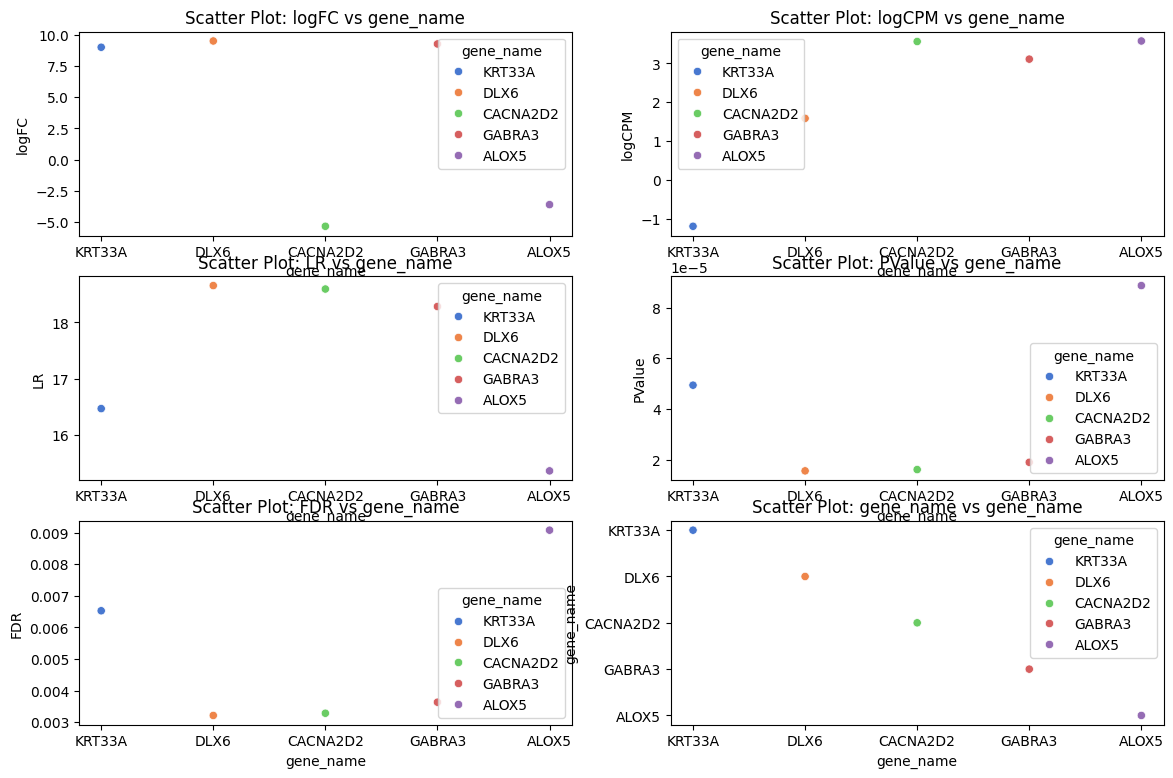

In [ ]:
# Calculate the number of rows and columns for the subplot grid
num_cols = len(df.columns[:-1])
num_rows = (num_cols + 1) // 2  # Calculate rows, ensuring at least 1

plt.figure(figsize=(14, 9))

# Iterate and create subplots
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(num_rows, 2, i + 1)  # Use calculated rows and columns
    sns.scatterplot(data=filtered_data, y=column, x='gene_name', hue='gene_name', palette="muted")
    plt.title(f'Scatter Plot: {column} vs gene_name')
    plt.xlabel("gene_name")
    plt.ylabel(column)

<ipython-input-76-1ff8c3f326da>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_data, x='gene_name', y=column, palette="pastel")
<ipython-input-76-1ff8c3f326da>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_data, x='gene_name', y=column, palette="pastel")
<ipython-input-76-1ff8c3f326da>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_data, x='gene_name', y=column, palette="pastel")
<ipython-input-76-1ff8c3f326da>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecate

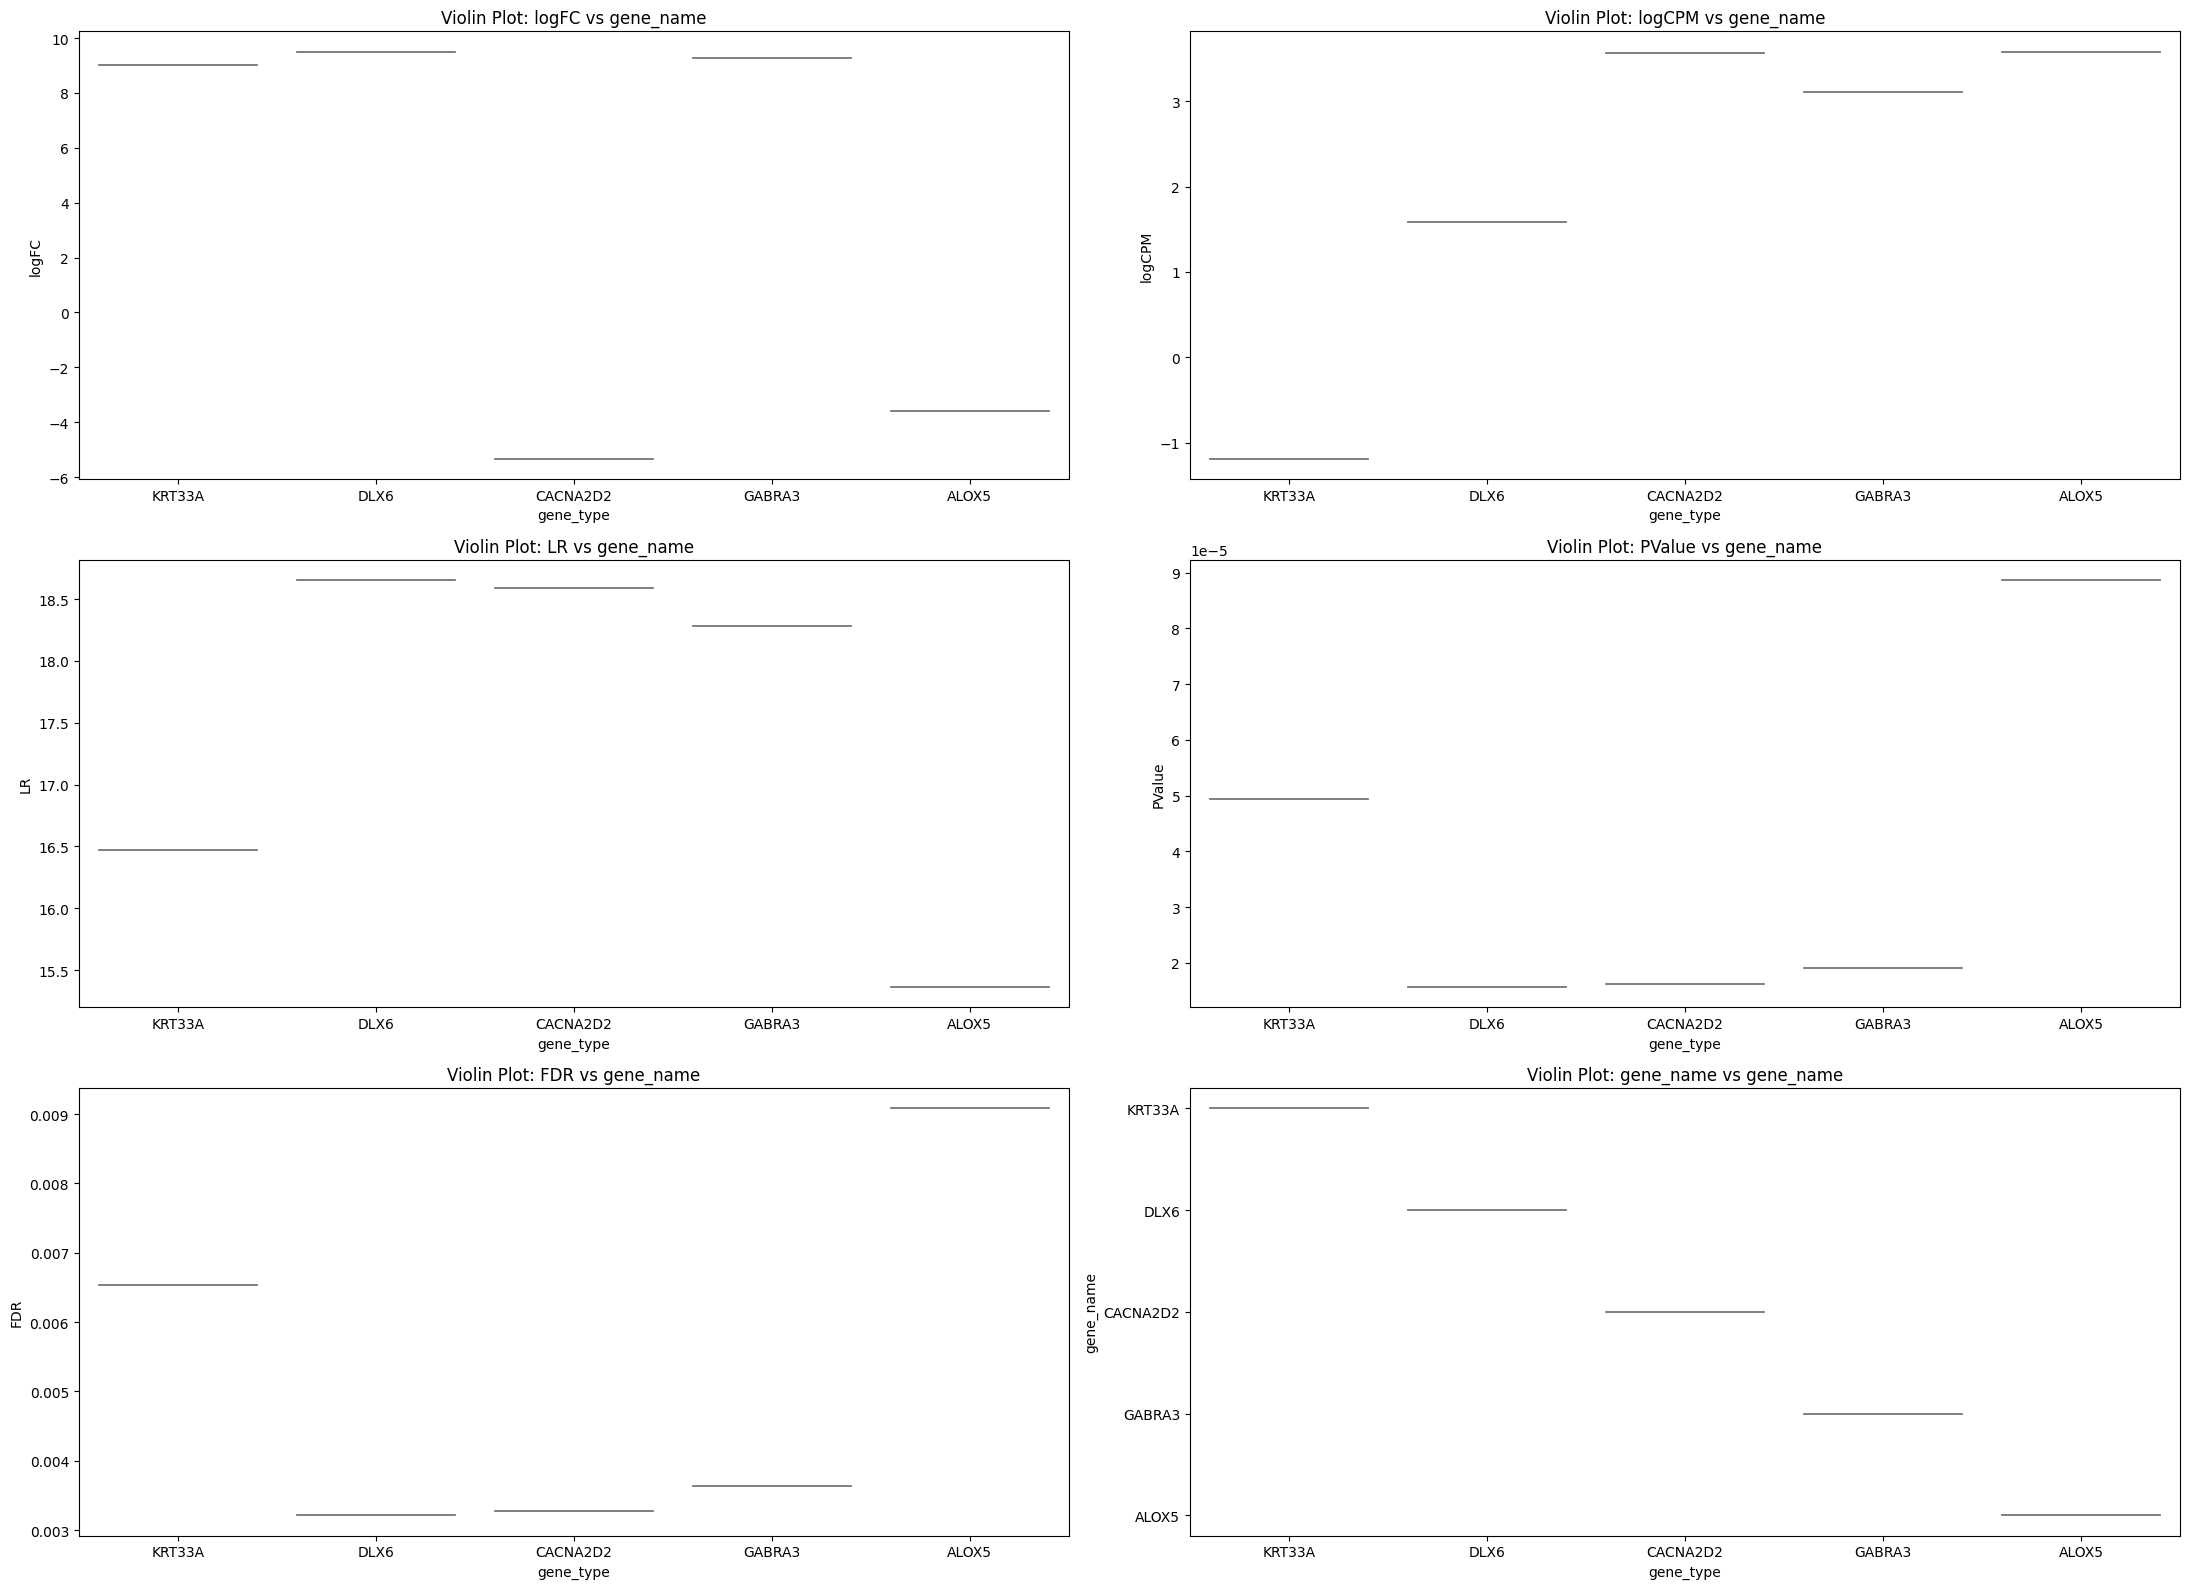

In [ ]:
plt.figure(figsize=(22, 16))
# Calculate the number of rows and columns for the subplot grid to fit all columns
num_cols = len(df.columns[:-1])
num_rows = (num_cols + 1) // 2  # Calculate rows, ensuring at least 1

for i, column in enumerate(df.columns[:-1]):
    # Use calculated rows and columns
    plt.subplot(num_rows, 2, i + 1)
    sns.violinplot(data=filtered_data, x='gene_name', y=column, palette="pastel")
    plt.title(f'Violin Plot: {column} vs gene_name')
    plt.xlabel('gene_type')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

## correlation analysis

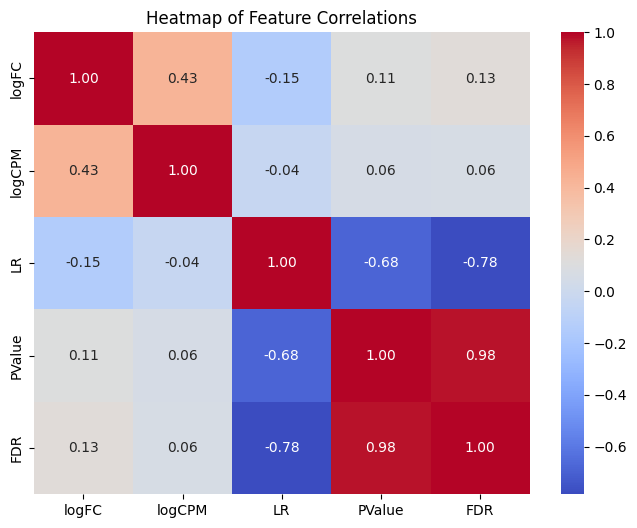

,logFC,logCPM,LR,PValue,FDR
logFC,1.000000,0.425880,-0.149213,0.105616,0.129087
logCPM,0.425880,1.000000,-0.036394,0.056282,0.063750
LR,-0.149213,-0.036394,1.000000,-0.684187,-0.783992
PValue,0.105616,0.056282,-0.684187,1.000000,0.978430
FDR,0.129087,0.063750,-0.783992,0.978430,1.000000


In [ ]:
# Assuming 'gene_type' is the column with non-numeric values like 'KRT33A'
# and it's the last column as per the provided traceback, we exclude it.
correlation_matrix = df.select_dtypes(include='number').corr()  # Select only numeric columns for correlation

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()
correlation_matrix

# visualize class Distibutation


<ipython-input-38-fa4cfaeabbd3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gene_type', data=df, palette="pastel")


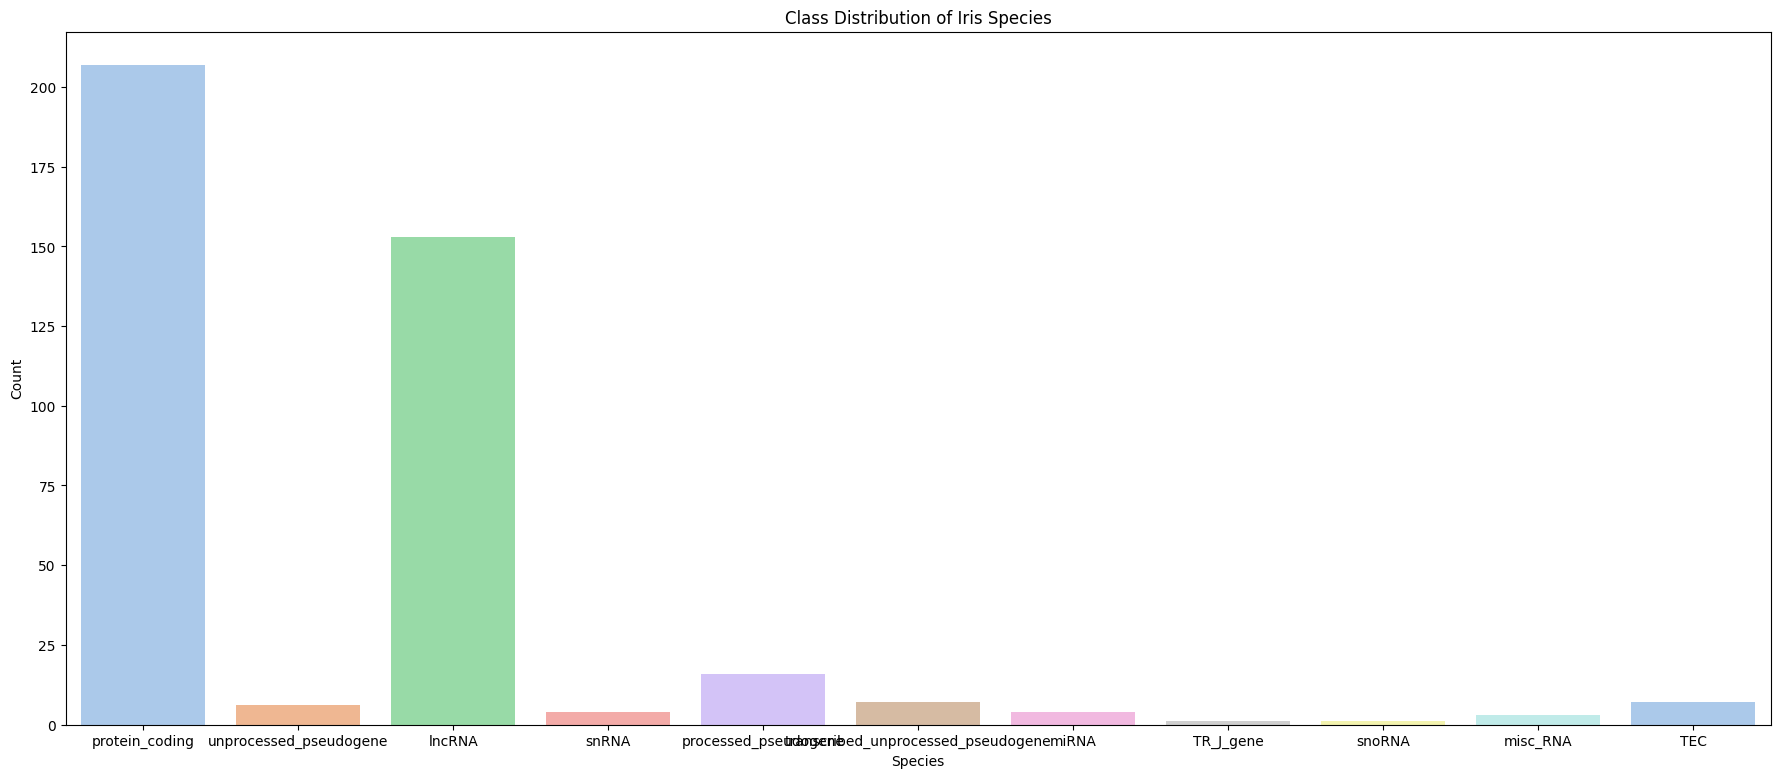

In [ ]:
plt.figure(figsize=(22, 9))
sns.countplot(x='gene_type', data=df, palette="pastel")
plt.title('Class Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


<ipython-input-39-dedc94f4992f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_data, x="gene_name", y="PValue", palette="muted")


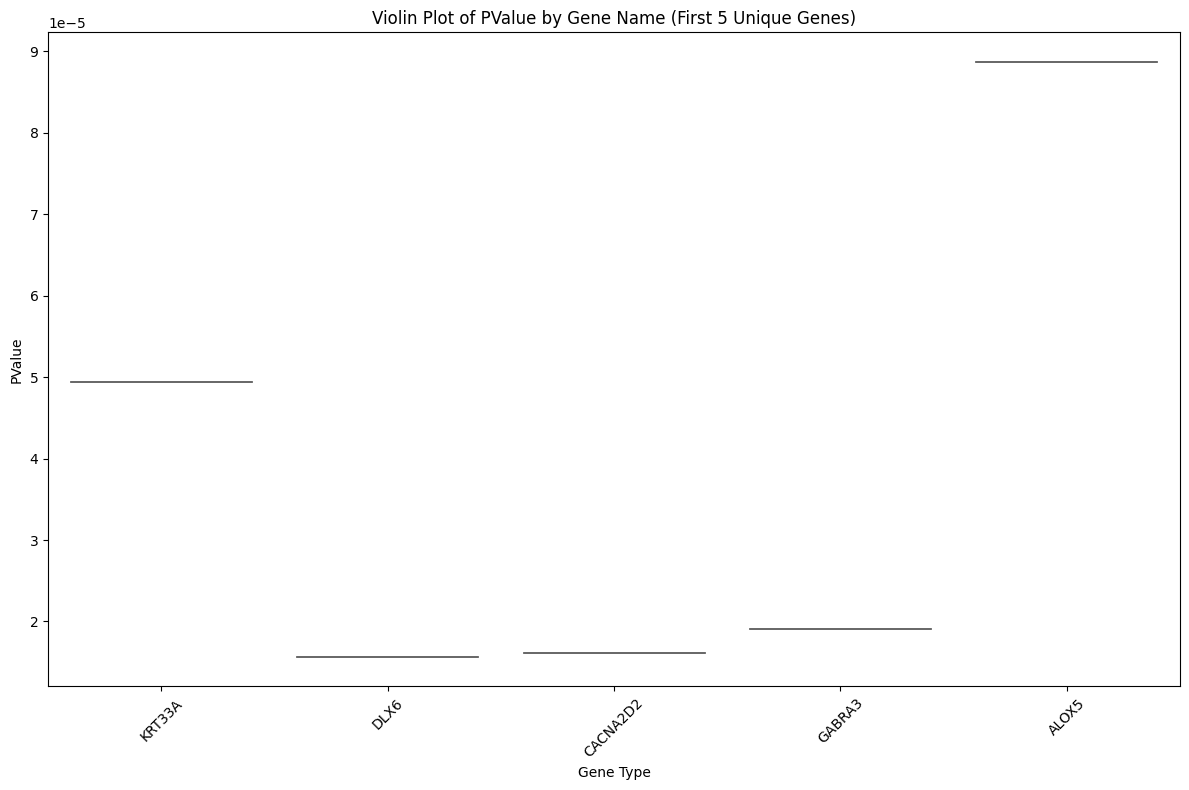

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=filtered_data, x="gene_name", y="PValue", palette="muted")
plt.title("Violin Plot of PValue by Gene Name (First 5 Unique Genes)")
plt.xlabel("Gene Type")
plt.ylabel("PValue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-40-698abc72e47c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x="gene_type", y="PValue", palette="muted")


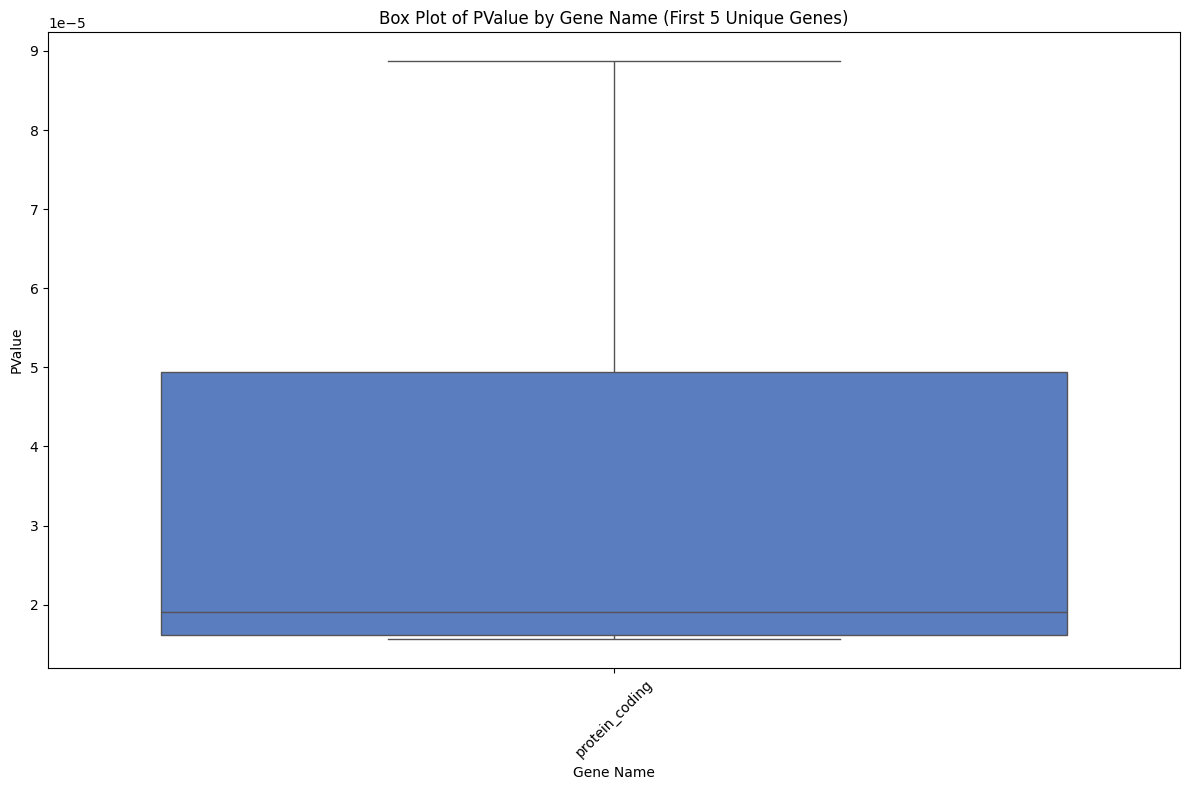

In [ ]:



# Plotting a box plot for PValue by gene_name for the first 5 unique genes
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data, x="gene_type", y="PValue", palette="muted")
plt.title("Box Plot of PValue by Gene Name (First 5 Unique Genes)")
plt.xlabel("Gene Name")
plt.ylabel("PValue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


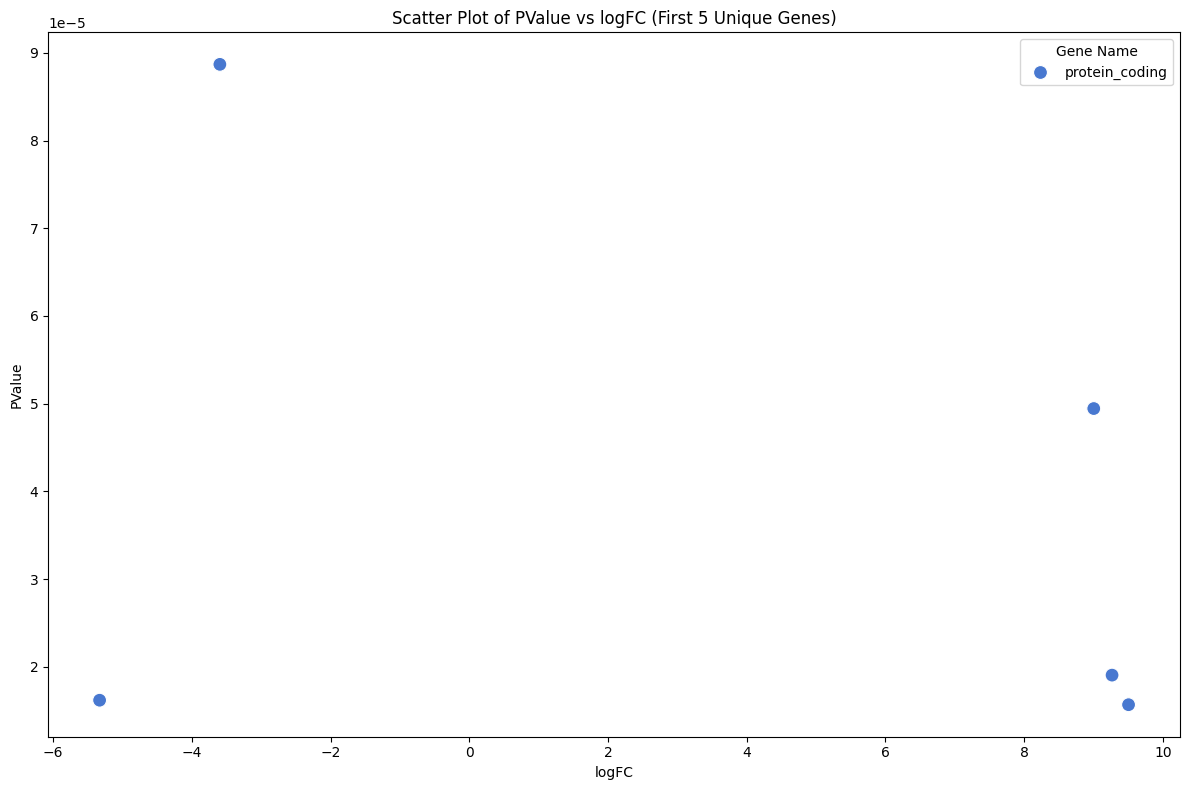

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_data, x="logFC", y="PValue", hue="gene_type", palette="muted", s=100)
plt.title("Scatter Plot of PValue vs logFC (First 5 Unique Genes)")
plt.xlabel("logFC")
plt.ylabel("PValue")
plt.legend(title="Gene Name", loc="upper right" )
plt.tight_layout()
plt.show()

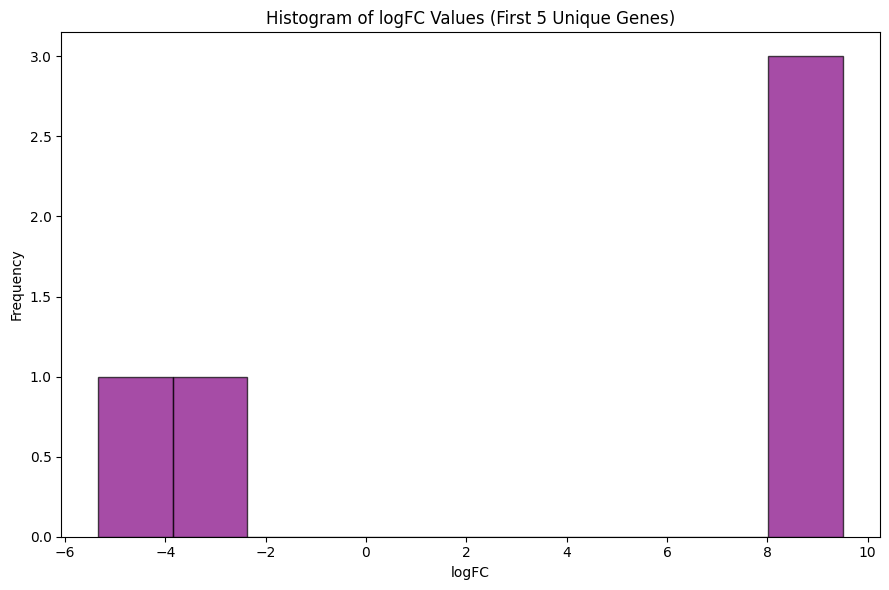

In [ ]:
# Creating a histogram for logFC values of the first 5 unique genes
plt.figure(figsize=(9, 6))
plt.hist(filtered_data["logFC"], bins=10, color="purple", edgecolor="black", alpha=0.7)
plt.title("Histogram of logFC Values (First 5 Unique Genes)")
plt.xlabel("logFC")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
df.dropna()

,logFC,logCPM,LR,PValue,FDR,gene_name,gene_type
0,9.002815,-1.184566,16.469407,0.000049,0.006529,KRT33A,protein_coding
1,9.504382,1.589077,18.654571,0.000016,0.003214,DLX6,protein_coding
2,-5.330197,3.564229,18.593286,0.000016,0.003284,CACNA2D2,protein_coding
3,9.266483,3.111430,18.282856,0.000019,0.003633,GABRA3,protein_coding
4,-3.596017,3.577662,15.363317,0.000089,0.009082,ALOX5,protein_coding
...,...,...,...,...,...,...,...
404,-5.441667,-4.142006,15.327213,0.000090,0.009126,AL359813.2,lncRNA
405,-5.109520,-3.867831,15.817746,0.000070,0.008101,AC099535.2,lncRNA
406,-6.213945,-3.590990,20.651780,0.000006,0.001769,AL390071.1,lncRNA
407,-6.213945,-3.590990,20.651780,0.000006,0.001769,AP005901.6,lncRNA


In [ ]:
sorted_data = df.sort_values(by='gene_name', ascending=False)

# Step 3: Select the top 8 genes
top_8_genes = sorted_data.head(5)

# Display the top 8 genes
print(top_8_genes)

         logFC    logCPM         LR    PValue       FDR  gene_name  \
356   8.049849 -2.084455  15.191429  0.000097  0.009500    ZNF887P   
364  -5.664320 -3.459746  17.324325  0.000032  0.004920     ZNF728   
183   7.303415 -0.579586  17.373209  0.000031  0.004837     ZNF695   
177  -5.580662 -3.523876  15.573770  0.000079  0.008767     ZNF676   
308  11.974199  1.735510  20.903438  0.000005  0.001648  ZFHX4-AS1   

                              gene_type  
356  transcribed_unprocessed_pseudogene  
364                      protein_coding  
183                      protein_coding  
177                      protein_coding  
308                              lncRNA  


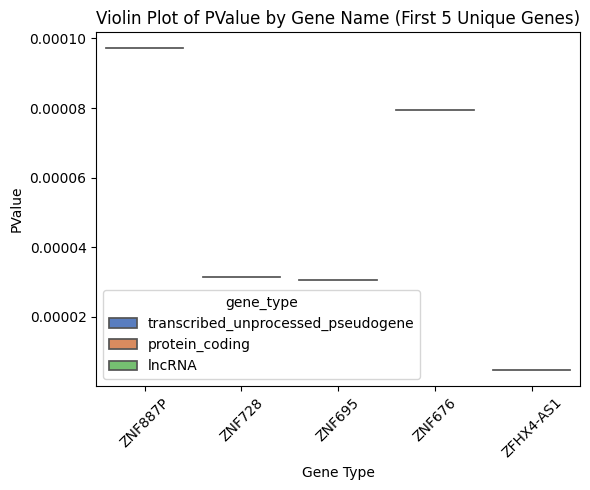

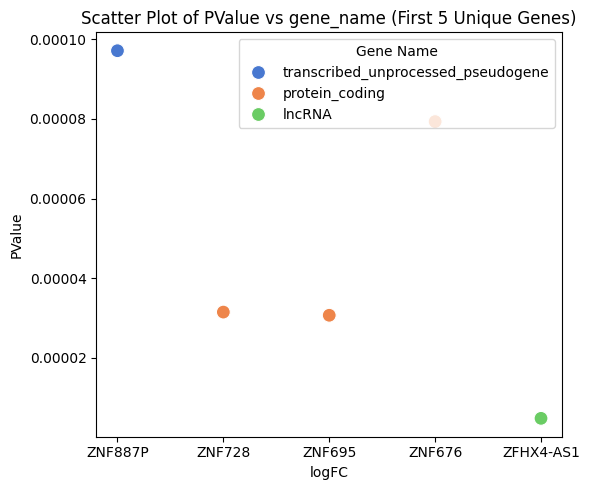

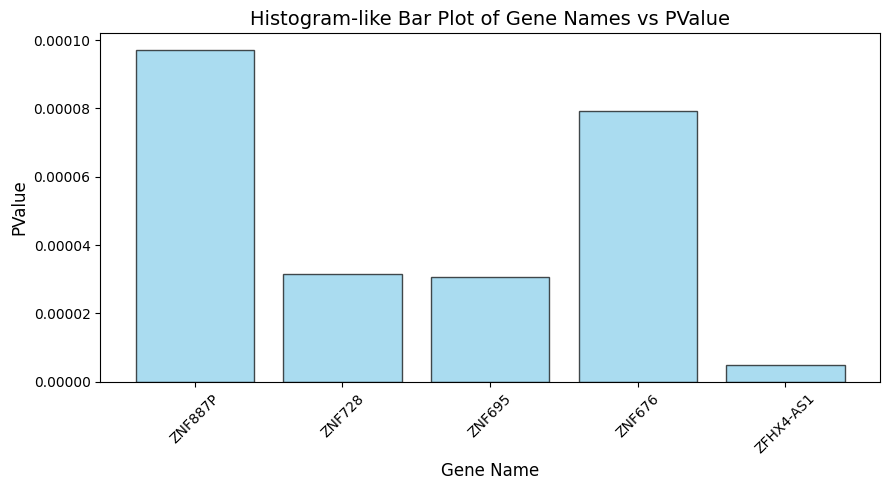

In [ ]:
plt.figure(figsize=(6, 5))
sns.violinplot(data=top_8_genes, x="gene_name", y="PValue", hue="gene_type" ,palette="muted")
plt.title("Violin Plot of PValue by Gene Name (First 5 Unique Genes)")
plt.xlabel("Gene Type")
plt.ylabel("PValue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
sns.scatterplot(data=top_8_genes, x="gene_name", y="PValue", hue="gene_type", palette="muted", s=100)
plt.title("Scatter Plot of PValue vs gene_name (First 5 Unique Genes)")
plt.xlabel("logFC")
plt.ylabel("PValue")
plt.legend(title="Gene Name", loc="upper right" )
plt.tight_layout()
plt.show()

# Creating a histogram for logFC values of the first 5 unique genes
# Create a histogram-like bar plot for Gene_Name vs PValue
plt.figure(figsize=(9, 5))
plt.bar(top_8_genes['gene_name'], top_8_genes['PValue'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram-like Bar Plot of Gene Names vs PValue', fontsize=14)
plt.xlabel('Gene Name', fontsize=12)
plt.ylabel('PValue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


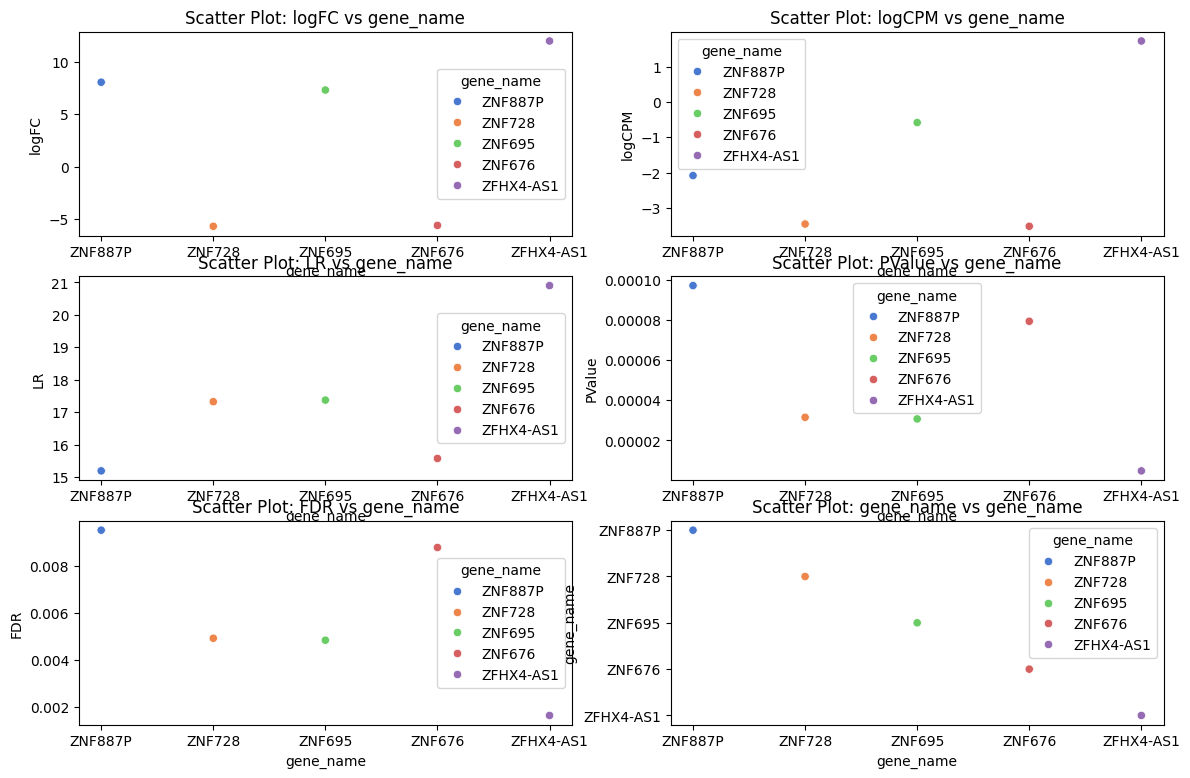

In [ ]:
# Calculate the number of rows and columns for the subplot grid
num_cols = len(df.columns[:-1])
num_rows = (num_cols + 1) // 2  # Calculate rows, ensuring at least 1

plt.figure(figsize=(14, 9))

# Iterate and create subplots
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(num_rows, 2, i + 1)  # Use calculated rows and columns
    sns.scatterplot(data=top_8_genes, y=column, x='gene_name', hue='gene_name', palette="muted")
    plt.title(f'Scatter Plot: {column} vs gene_name')
    plt.xlabel("gene_name")
    plt.ylabel(column)